<a href="https://colab.research.google.com/github/Ghonem22/Learning/blob/main/Python3%20object%20oriented%20programming/CH3%2C%20When%20Objects%20Are%20Alike/When_Objects_Are_Alike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What will we cover in this chapter?


* Basic inheritance

* Inheriting from built-ins

* Multiple inheritance

* Polymorphism and duck typing



---



## Basic inheritance


*   Every class we create uses inheritance.

*   All Python classes are subclasses of the special class named object.


* If we don't explicitly inherit from a different class, our classes  automatically inherit from object.

---



```
class MySubClass(object):
    pass

my_object = MySubClass()
    
```

*  Python 3 automatically inherits from object if we don't explicitly provide a different superclass.

*  In this case, the superclass is object, and MySubClass is the
subclass.

---

#### Let's build a simple contact manager that tracks the name and e-mail address of several people.

In [ ]:
class Contact:
    all_contacts = []    # This is class variables, it is shared by all instances of this class

    def __init__(self, name, email):
        self.name = name
        self.email = email
        Contact.all_contacts.append(self)  

In [ ]:
class Supplier(Contact):
    def order(self, order):
        print(f" {order} from {self.name} through his email: {self.email}")

**Supplier class here inherit from Contact class (Superclass), which mean it has all its attributes and methods, besides Supplier's own attributes and methods (Just one method "order()" in our case)**

In [ ]:
# instantiate two objects, one from Contact Class and another from Suppplier
contact = Contact('ghonem', 'ghonem@client.com')
supplier = Supplier('sayed','sayed@supplier.com' )

In [ ]:
supplier.order('buy a car')

 buy a car from sayed through his email: sayed@supplier.com


In [ ]:
contact.order('buy a car')

AttributeError: 'Contact' object has no attribute 'order'

We can see that supplier can access its superclass's attributes besides its own methon, but Contact can't access Supplier's attributes or methods.

In [ ]:
Contact.all_contacts

all_contacts is a list shared between all Contact's objects, and Supplier inherited that, which mean that all_contacts will contain all the objects of Contact and its subclasses

In [ ]:
contacts = Contact.all_contacts
for contact in contacts:
    print(f"name: {contact.name} \t email: {contact.email} \t type: {type(contact)}")

name: ghonem 	 email: ghonem@client.com 	 type: <class '__main__.Contact'>
name: sayed 	 email: sayed@supplier.com 	 type: <class '__main__.Supplier'>
name: ghonem 	 email: ghonem@client.com 	 type: <class '__main__.Contact'>
name: sayed 	 email: sayed@supplier.com 	 type: <class '__main__.Supplier'>


The Contacts are doubled because we ran the code twice, and we didn't implemented any restrictions that prevent repeatation.

## Extending built-ins

### What if we also wanted to search for an object in all_contacts list  by its name/ email..?

we could add a method to Contact class that do that job, but it feels like this method actually belongs to the list itself. So, We will create a seperate class that inherit from list built-in class, then we will add to it this method.

In [ ]:
class ContactList(list):
    '''
    here ContactList inherit from the built-in list class, which mean it
    becomes a list and it gains for free all the lists' attributes
    and methods like append, len ...
    
    Then we can add any additional attributes and methods we want, as we will
    do here by adding a method to search by name.
    '''
    def search(self, name):
        matching_contacts = []
        for contact in self:
            if name in contact.name:
                matching_contacts.append(contact)  
        return matching_contacts

    
class Contact:
    all_contacts = ContactList()
    def __init__(self, name, email):
        self.name = name
        self.email = email
        self.all_contacts.append(self)

        
class Supplier(Contact):
    def order(self, order):
        print(f" {order} from {self.name} through his email: {self.email}")

In [ ]:
contact = Contact('ghonem', 'ghonem@client.com')
supplier = Supplier('sayed','sayed@supplier.com' )

In [ ]:
contact.all_contacts

[<__main__.Contact at 0x27c2b06f040>, <__main__.Supplier at 0x27c2b06f0d0>]

In [ ]:
objects = Contact.all_contacts.search('gh')

In [ ]:
print("Name: {} \nEmail: {}".format(objects[0].name,objects[0].email))

Name: ghonem 
Email: ghonem@client.com


Remember that search method return a list of objects, So we can't call name and email directly, we should retive a specific object from the list first, which we did by calling first object with indix zero "objects[0]" 

### How does ContactList inherit from list?

#### [ ] is actually a shorthand for creating an empty list using list();



```
[] == list()

```
True



---

[ ] called syntax sugar that calls the list() constructor under the hood.




```
isinstance([], object)

```

True

---

### This is similar to dictionary, where { } is equivelant to dict class


In [ ]:
class LongNameDict(dict):

    def longest_key(self):
        longest = ''
        for key in self:
            if len(key) > len(longest):
                longest = key
        return longest

In [ ]:
dictionary = LongNameDict()

dictionary['helloworld'] = 1
dictionary['hello'] = 1
dictionary['hello2'] = 'world'

In [ ]:
dictionary.longest_key()

'helloworld'

**Most built-in types can be similarly extended. Commonly extended built-ins are object, list, set, dict, file, and str. Numerical types such as int and float are also occasionally inherited from.**

## Overriding and super

### what if we want to add a phone number for our close friends?

**we have to override the constructor __ init __ as we will illistrate bellow**

#### any method can be overriden by the same way

In [ ]:
class friend(Contact):
    def __init__(self, name, email, phone_num):
        self.name = name
        self.email = email
        self.phone_num = phone_num        

### But the example above has some problems:


*   Contact and Friend classes have duplicate code to set up the name and email properties, this can make code maintenance complicated.

*   Friend class is neglecting to add itself to the all_contacts list we have created on the Contact class.

---

**So we really need to execute the original __ init __ method on the Contact class.**

**This is what the super function does; it returns the object as an instance of the parent class, allowing us to call the parent method directly:**



In [ ]:
class friend(Contact):

    def __init__(self, name, email, phone_num):
        super().__init__(self, name, email)
        self.phone_num = phone_num        

## Multiple inheritance


---

### A mixin
it is generally a superclass that is not meant to exist on its own, but is meant to be inherited by some other class to provide extra functionality.

---

In [ ]:
'''
Notice that MailSender uses self.email internally in send_mail method, which make
no sense if we used it directly because it has no attribute called email.
'''
class MailSender:
    def send_mail(self, message):
        print("Sending mail to " + self.email)
        # Add e-mail logic here

In [ ]:
class EmailableContact(Contact, MailSender):
    pass

In [ ]:
e = EmailableContact("John Smith", "jsmith@example.net")

In [ ]:
e.send_mail("Hello, test e-mail here")

Sending mail to jsmith@example.net


### adding a home address to our Friend class.

An address is a collection of strings representing the street, city, country, and other related details of the contact.


*  pass each of these strings as a parameter into the Friend class's __ init __ method.
*   store these strings in a tuple or dictionary and pass them into __ init __ as a single argument.
*   create a new Address class to hold those strings together, and then pass an instance of this class into the __ init __ method of our Friend class. so we can add behavior

---


In [ ]:
class AddressHolder:
    def __init__(self, street, city, state, code):
        self.street = street
        self.city = city
        self.state = state
        self.code = code

Given that, if a class includes attributes only with no methods, it's preferred sometimes to instead use one of python data structures.

## The diamond problem

The tricky part in mutliple inheritance is that we now have two parent __ init __ methods both of which need to be initialized.

### Here How can we do that:
### naive approach:

In [ ]:
class Friend(Contact, AddressHolder):
    def __init__(
    self, name, email, phone,street, city, state, code):
        Contact.__init__(self, name, email)
        AddressHolder.__init__(self, street, city, state, code)
        self.phone = phone

In [ ]:
x = Friend(name = 'dd', email = 'dd', phone = 'dd',street = 'dd', city = 'dd', state = 'dd', code = 'dd')

In [ ]:
x.all_contacts

#### problems with this naive method:



*   It is possible for a superclass to go uninitialized if we neglect to explicitly call the initializer. That wouldn't break the code, which will make debuging process harder.

*   There's a possibility of a superclass being called multiple times because of the organization of the class hierarchy

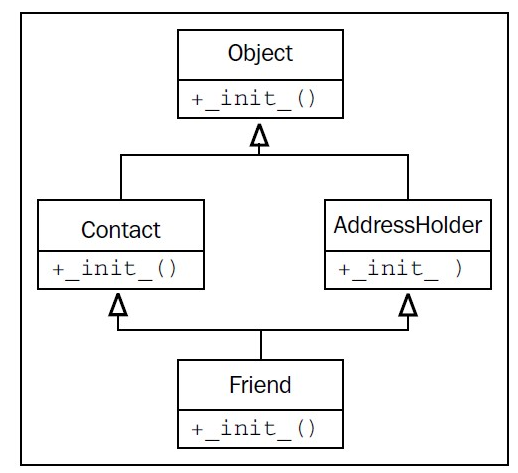

#### We will use this example to illistrate  this problem in more details. 

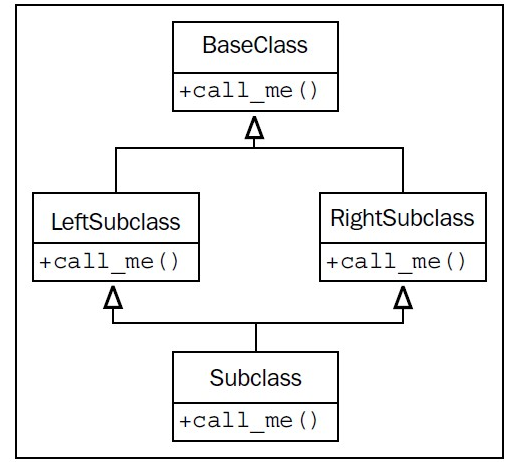

In [ ]:
class BaseClass:
    num_base_calls = 0
    def call_me(self):
        print("Calling method on Base Class")
        self.num_base_calls += 1


class LeftSubclass(BaseClass):
    num_left_calls = 0
    def call_me(self):
        BaseClass.call_me(self)
        print("Calling method on Left Subclass")
        self.num_left_calls += 1


class RightSubclass(BaseClass):
    num_right_calls = 0
    def call_me(self):
        BaseClass.call_me(self)
        print("Calling method on Right Subclass")
        self.num_right_calls += 1


class Subclass(LeftSubclass, RightSubclass):
    num_sub_calls = 0
    def call_me(self):
        LeftSubclass.call_me(self)
        RightSubclass.call_me(self)
        print("Calling method on Subclass")
        self.num_sub_calls += 1

In [ ]:
s = Subclass()
s.call_me()

Calling method on Base Class
Calling method on Left Subclass
Calling method on Base Class
Calling method on Right Subclass
Calling method on Subclass


In [ ]:
print(  s.num_sub_calls,
        s.num_left_calls,
        s.num_right_calls,
        s.num_base_calls
     )

1 1 1 2


We can see that calling Subclass trigered Base Class init and call_me() twice, which is a great problem in some cases. What if we deal with a sensitive data?  

### Overcome Diamod Problem using "super"
super was originally developed to make complicated forms of multiple inheritance possible

In [ ]:
class BaseClass:
    num_base_calls = 0
    def call_me(self):
        print("Calling method on Base Class")
        self.num_base_calls += 1

class LeftSubclass(BaseClass):
    num_left_calls = 0
    def call_me(self):
        super().call_me()
        print("Calling method on Left Subclass")
        self.num_left_calls += 1


class RightSubclass(BaseClass):
    num_right_calls = 0
    def call_me(self):
        super().call_me()
        print("Calling method on Right Subclass")
        self.num_right_calls += 1


class Subclass(LeftSubclass, RightSubclass):
    num_sub_calls = 0
    def call_me(self):
        super().call_me()
        print("Calling method on Subclass")
        self.num_sub_calls += 1

In [ ]:
s = Subclass()
s.call_me()

Calling method on Base Class
Calling method on Right Subclass
Calling method on Left Subclass
Calling method on Subclass


In [ ]:
print(  s.num_sub_calls,
        s.num_left_calls,
        s.num_right_calls,
        s.num_base_calls
     )

1 1 1 1


This time, calling Subclass trigered Base Class init and call_me() just once.

**First, call_me of Subclass calls super().call_me(), which happens to refer
to LeftSubclass.call_me(). The LeftSubclass.call_me() method then calls
super().call_me(), but in this case, super() is referring to RightSubclass.call_
me().**

## Different sets of arguments

we need a way to pass the "extra" arguments so that subsequent calls to super, on other subclasses, receive the right arguments.



---

We have to design our base class parameter lists to accept keyword arguments for any parameters that are not required by every subclass implementation.



---

**kwargs parameter is included to capture any additional parameters that our particular method doesn't know what to do with. It passes these parameters up to the next class with the super call.


In [ ]:
class AddressHolder:
    def __init__(self, street, city, state, code):
        self.street = street
        self.city = city
        self.state = state
        self.code = code

        
class Contact:
    all_contacts = []
    def __init__(self, name='', email='', **kwargs):
        super().__init__(**kwargs)
        self.name = name
        self.email = email
        self.all_contacts.append(self)

        
class Friend(Contact, AddressHolder):
    def __init__(self, phone='', **kwargs):
        super().__init__(**kwargs)
        self.phone = phone

In [ ]:
x = Friend(name = 'dd', email = 'dd', phone = 'dd',street = 'dd', city = 'dd', state = 'dd', code = 'dd')

In [ ]:
x.street

'dd'

## Polymorphism

different behaviors happen depending on which subclass is being used, without having to explicitly know what the subclass actually is.

In [ ]:
class AudioFile:
    def __init__(self, filename):
        if not filename.endswith(self.ext):
            raise Exception("Invalid file format")
        self.filename = filename

class MP3File(AudioFile):
    ext = "mp3"
    def play(self):
        print("playing {} as mp3".format(self.filename))


class WavFile(AudioFile):
    ext = "wav"
    def play(self):
        print("playing {} as wav".format(self.filename))

class OggFile(AudioFile):
    ext = "ogg"
    def play(self):
        print("playing {} as ogg".format(self.filename))

In [ ]:
ogg = OggFile("myfile.ogg")
ogg.play()

playing myfile.ogg as ogg


 ### Polymorphism  refers to the use of a single type entity (method, perator or object) to represent different types in different scenarios.


### Example:



*   '+'  operator is used to:


            5 + 7
            "my" + " name" + " is"



*   Polymorphic len() function


            print(len("Programiz"))
            print(len(["Python", "Java", "C"]))
            print(len({"Name": "John", "Address": "Nepal"}))


That will output:

            9
            3
            2

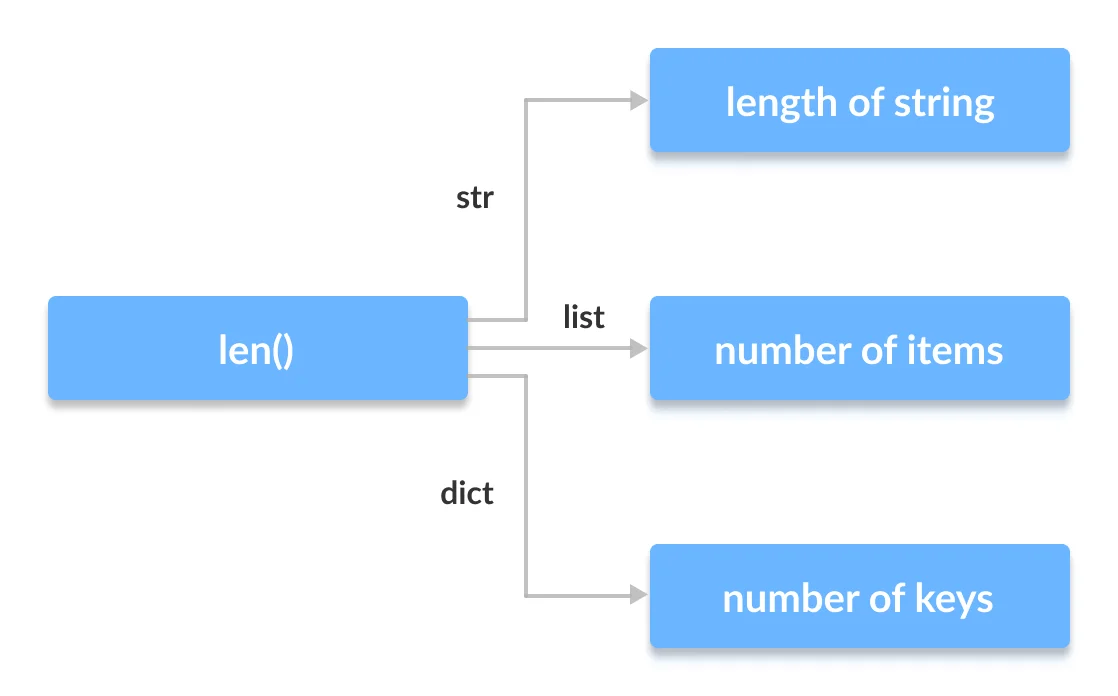

In [ ]:
class Cat:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def info(self):
        print(f"I am a cat. My name is {self.name}. I am {self.age} years old.")

    def make_sound(self):
        print("Meow")


class Dog:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def info(self):
        print(f"I am a dog. My name is {self.name}. I am {self.age} years old.")

    def make_sound(self):
        print("Bark")


cat1 = Cat("Kitty", 2.5)
dog1 = Dog("Fluffy", 4)

for animal in (cat1, dog1):
    animal.make_sound()
    animal.info()
    animal.make_sound()


Meow
I am a cat. My name is Kitty. I am 2.5 years old.
Meow
Bark
I am a dog. My name is Fluffy. I am 4 years old.
Bark


### Polymorphism and Inheritance: Method Overriding

In [ ]:
from math import pi

class Shape:
    def __init__(self, name):
        self.name = name

    def area(self):
        pass

    def fact(self):
        return "I am a two-dimensional shape."

    # Print this val If we print the object
    def __str__(self):
        return self.name


class Square(Shape):
    def __init__(self, length):
        super().__init__("Square")
        self.length = length

    def area(self):
        return self.length**2

    def fact(self):
        return "Squares have each angle equal to 90 degrees."


class Circle(Shape):
    def __init__(self, radius):
        super().__init__("Circle")
        self.radius = radius

    def area(self):
        return pi*self.radius**2


a = Square(4)
b = Circle(7)
print(b)
print(b.fact())
print(a.fact())
print(b.area())


Circle
I am a two-dimensional shape.
Squares have each angle equal to 90 degrees.
153.93804002589985


## Abstract base classes

* A class is called an Abstract class if it contains one or more abstract methods. An abstract method is a method that is declared, but contains no implementation. Abstract classes may not be instantiated, and its abstract methods must be implemented by its subclasses.

* An abstract method is a method that has a declaration but does not have an implementation. 


* ABCs introduce virtual subclasses, which are classes that don’t inherit from a class but are still recognized by isinstance() and issubclass() functions. 

* The 'abc' module in Python library provides the infrastructure for defining custom abstract base classes.

* 'abc' works by marking methods of the base class as abstract. This is done by @absttractmethod decorator. A concrete class which is a sub class of such abstract base class then implements the abstract base by overriding its abstract methods.

* The abc module defines ABCMeta class which is a metaclass for defining abstract base class.

*  we use an abstract class as a template and according to the need, we extend it and build on it before we can use it. Due to the fact, an abstract class is not a concrete class, it cannot be instantiated. When we create an object for the abstract class it raises an error. 


---


Resource: 
https://www.tutorialspoint.com/abstract-base-classes-in-python-abc

In [ ]:
import abc

class Shape(metaclass=abc.ABCMeta):
   @abc.abstractmethod
   def area(self):
      pass


'''
# the abc module also defines ABC helper class which can be used instead of ABCMeta class in definition of abstract base class.


class Shape(abc.ABC):
   @abc.abstractmethod
   def area(self):
      pass
'''
class Rectangle(Shape):
   def __init__(self, x,y):
      self.l = x
      self.b=y

   def area(self):
      return self.l*self.b

r = Rectangle(10,20)
print ('area: ',r.area())


# Note the abstract base class may have more than one abstract methods. 
# The child class must implement all of them failing which TypeError will be raised.



area:  200


In [ ]:
class Rectangle(Shape):
   def __init__(self, x,y):
      self.l = x
      self.b=y

   def circum(self):
      return self.l*self.b
      
r = Rectangle(10,20)

TypeError: Can't instantiate abstract class Rectangle with abstract methods area

### Using an abstract base class

In [ ]:
from collections import Container
Container.__abstractmethods__

frozenset({'__contains__'})

In [ ]:
help(Container.__contains__)

Help on function __contains__ in module collections.abc:

__contains__(self, x)



the Container class has exactly one abstract method that needs to be implemented, contains. You can issue help(Container.contains) to see what the function signature should look like:

In [ ]:
class OddContainer:
    def __contains__(self, x):
        if not isinstance(x, int) or not x % 2:
            return False
        return True

odd_container = OddContainer()

print(isinstance(odd_container, Container))

print(issubclass(OddContainer, Container))

True
True


And that is why duck typing is way more awesome than classical polymorphism. We can create a relationships without the overhead of using inheritance (or worse, multiple inheritance).

## Static method


*   Static methods in Python are extremely similar to python class level methods, the difference being that a static method is bound to a class rather than the objects for that class.

* This means that a static method can be called without an object for that class. This also means that static methods cannot modify the state of an object as they are not bound to it. Let’s see how we can create static methods in Python.

---
We can define Method as static using:



*   @staticmethod before the method

*   method_name = staticmethod(method_name).   after the method


This is pretty much advantageous when we need to create Utility methods as they aren’t tied to an object lifecycle usually.

## Case study

You can review the detailed description of the case study in page 82 in our book. I will include below the system **UML**

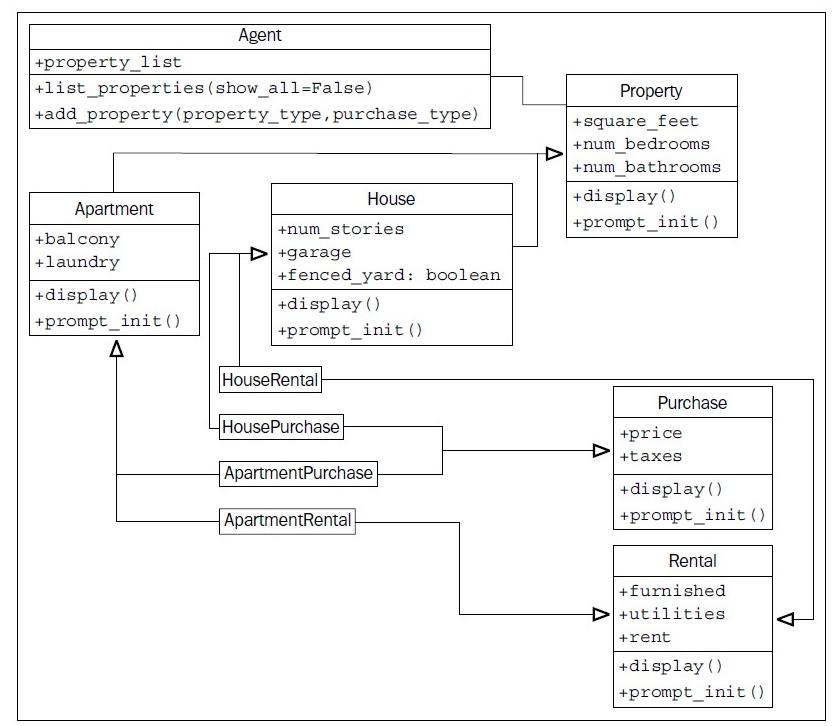

In [ ]:
class Property:
    def __init__(self, square_feet='', beds='', baths='', **kwargs):
        super().__init__(**kwargs)
        self.square_feet = square_feet
        self.num_bedrooms = beds
        self.num_baths = baths

    def display(self):
        print("PROPERTY DETAILS")
        print("================")
        print("square footage: {}".format(self.square_feet))
        print("bedrooms: {}".format(self.num_bedrooms))
        print("bathrooms: {} \n".format(self.num_baths))

    def prompt_init():
        return dict(square_feet=input("Enter the square feet: "),
                    beds=input("Enter number of bedrooms: "),
                    baths=input("Enter number of baths: "))
    prompt_init = staticmethod(prompt_init)
    
    # or we can use     @staticmethod  before the method

    '''
    Static methods are associated only with a class (something like class variables), rather than a specific object instance.
    Hence, they have no self argument. Because of this, the super keyword won't work.
    This method uses the Python dict constructor to create a dictionary of values that can be passed into __init__  
    '''

**Let's try to instansiate an object of this class:**

In [ ]:
init = Property.prompt_init()

pto = Property(**init)

Enter the square feet: 20
Enter number of bedrooms: 3
Enter number of baths: 2


In [ ]:
pto.display()

PROPERTY DETAILS
square footage: 20
bedrooms: 3
bathrooms: 2 



In [ ]:
def get_valid_input( input_string, valid_options):
    '''
    display input_string message + valid_options to the users, and make sure
    that user input a choice from valid_options.
    '''
    input_string += "{}".format(valid_options)
    response = input(input_string)
    while response.lower() not in valid_options:
        response = input(input_string)
    return response

    
class Apartment(Property, Check_input):

    valid_laundries = ("coin", "ensuite", "none")
    valid_balconies = ("yes", "no", "solarium")

    def __init__(self, balacony = '', laundry = '', **kwargs):
        super().__init__( **kwargs )
        self.balacony = balacony
        self.laundry = laundry

    def display(self):
        super().display()
        print("Apartment details:\n================\nbalacony: {}\nlaundry: {} \n".format(self.balacony, self.laundry))


    def prompt_init():
        parent_init = Property.prompt_init()

        laundry =  get_valid_input("What laundry facilities does the property have? ", Apartment.valid_laundries)
        balacony = get_valid_input("Does the property have a balcony? ", Apartment.valid_balconies)

        parent_init.update({"laundry":laundry,
                            "balacony":balacony
                            })
        return parent_init

    prompt_init = staticmethod(prompt_init)



**Let's try this class:**

In [ ]:
init = Apartment.prompt_init()

Enter the square feet: 20
Enter number of bedrooms: 5
Enter number of baths: 3
What laundry facilities does the property have? ('coin', 'ensuite', 'none')coin
Does the property have a balcony? ('yes', 'no', 'solarium')no


In [ ]:
aprtment = Apartment(**init)
aprtment.display()

PROPERTY DETAILS
square footage: 20
bedrooms: 5
bathrooms: 3 

Apartment details:
balacony: no
laundry: coin 



**These  classes won't have a superclass (other than object), but we still call super().init because they are going to be combined with the other classes, and we don't know what order the super calls will be made in.**

In [ ]:
class House(Property):
    valid_garage = ("attached", "detached", "none")
    valid_fenced = ("yes", "no")

    def __init__(self, num_stories = '', garage = '', fenced_yard = '', **kwargs ):
        super().__init__( **kwargs)
        self.num_stories = num_stories
        self.garage = garage
        self.fenced_yard = fenced_yard

    def display(self):
        super().display()
        print("Apartment details:\n================ \nnum_stories: {} \ngarage: {} \nfenced_yard: {} \n".format(self.num_stories, self.garage, self.fenced_yard))

    def prompt_init():

        parent_init = Property.prompt_init()

        garage =  get_valid_input("is there a fenced a garage ? ", House.valid_garage)
        fenced_yard =  get_valid_input("is there a fenced yard? ", House.valid_fenced)
        num_stories = input("How many stories? ")

        parent_init.update({"garage": garage,
                            "fenced_yard": fenced_yard,
                            "num_stories": num_stories
                            })

        return parent_init

    prompt_init = staticmethod(prompt_init)

**Let's try this class:**

In [ ]:
init = Apartment.prompt_init()

Enter the square feet: 150
Enter number of bedrooms: 3
Enter number of baths: 2
What laundry facilities does the property have? ('coin', 'ensuite', 'none')coin
Does the property have a balcony? ('yes', 'no', 'solarium')yesyes
Does the property have a balcony? ('yes', 'no', 'solarium')yes


In [ ]:
house = Apartment(**init)
house.display()

PROPERTY DETAILS
square footage: 150
bedrooms: 3
bathrooms: 2 

Apartment details:
balacony: yes
laundry: coin 



In [ ]:
class Purchase:
    def __init__(self, price = '', taxes = '', **kwargs):
        super().__init__( **kwargs)
        self.price = price
        self.taxes = taxes

    def display(self):
        super().display()
        print("PURCHASE DETAILS:\n================ \nprice: {} \ntaxes: {}".format(self.price, self.taxes))

    def prompt_init():
        return dict(
            price = input("what's the selling price"),
            taxes = input("what's the estimated taxes")
        )
    
    prompt_init = staticmethod(prompt_init)


class Rental:
    def __init__(self, furnished = '', utilities = '', rent= '', **kwargs):
        super().__init__( **kwargs)
        self.furnished = furnished
        self.utilities = utilities
        self.rent = rent

    def display(self):
        super().display()
        print("Rental DETAILS:\n================ \nfurnished: {} \nutilities: {} \nrent: {} \n".format(self.furnished, self.utilities, self.rent))

    def prompt_init():
        return dict(
            furnished = get_valid_input("is it furnished? ", ("yes", "no")),
            utilities = input("what's the utilities? "),
            rent = input("what's the rent? ")
        )
    
    prompt_init = staticmethod(prompt_init)


**Let's try this class:**

In [ ]:
purachase_init = Purchase.prompt_init()

what's the selling price25555555
what's the estimated taxes2151


In [ ]:
purachase_init

{'price': '25555555', 'taxes': '2151'}

In [ ]:
rental_init = Rental.prompt_init()

is it furnished? ('yes', 'no')no
what's the utilities? 7
what's the rent? 251


In [ ]:
purachase = Purchase(**purachase_init)
purachase.display()

PURCHASE DETAILS:
price: 25555555 
taxes: 2151


In [ ]:
rental = Rental(**rental_init)
rental.display()

Rental DETAILS:
furnished: no 
utilities: 7 
rent: 251 



In [ ]:
class HouseRental(Rental, House):
    def prompt_init():
        init = House.prompt_init()
        init.update(Rental.prompt_init())
        return init
    prompt_init = staticmethod(prompt_init)


class ApartmentRental(Rental, Apartment):
    
    def prompt_init():
        init = Apartment.prompt_init()
        init.update(Rental.prompt_init())
        return init
    prompt_init = staticmethod(prompt_init)


class ApartmentPurchase(Purchase, Apartment):
    def prompt_init():
        init = Apartment.prompt_init()
        init.update(Purchase.prompt_init())
        return init
    prompt_init = staticmethod(prompt_init)


class HousePurchase(Purchase, House):
    def prompt_init():
        init = House.prompt_init()
        init.update(Purchase.prompt_init())
        return init
    prompt_init = staticmethod(prompt_init)

In [ ]:
init = HouseRental.prompt_init()

Enter the square feet: 250
Enter number of bedrooms: 2
Enter number of baths: 3
is there a fenced a garage ? ('attached', 'detached', 'none')none
is there a fenced yard? ('yes', 'no')no
How many stories? -
is it furnished? ('yes', 'no')no
what's the utilities? 2
what's the rent? 200


In [ ]:
house = HouseRental(**init)
house.display()

PROPERTY DETAILS
square footage: 250
bedrooms: 2
bathrooms: 3 

Apartment details:
num_stories: - 
garage: none 
fenced_yard: no 

Rental DETAILS:
furnished: no 
utilities: 2 
rent: 200 



**We will now build an object manager, which will  give the user an easy manner to instaniate an object from one of the four subclasses:**

- HouseRental
- HousePurchase
- ApartmentRental
- ApartmentPurchase

**With the ability to manage multiple objects**

In [ ]:
class Agent:

    type_map = {
            ("house", "rental"): HouseRental,
            ("house", "purchase"): HousePurchase,
            ("apartment", "rental"): ApartmentRental,
            ("apartment", "purchase"): ApartmentPurchase
            }

    def __init__(self):
        self.property_list = []

    def display_properties(self):
        for property in self.property_list:
            property.display()

    def add_property(self):
        property_type = get_valid_input(
                        "What type of property? ",
                        ("house", "apartment")).lower()

        payment_type = get_valid_input(
                        "What payment type? ",
                        ("purchase", "rental")).lower()

        # Get the calss with our property and payment types
        PropertyClass = self.type_map[
                        (property_type, payment_type)]

        init_args = PropertyClass.prompt_init()
        # pass these arguments to the PropertyClass and add it to the property_list
        self.property_list.append(PropertyClass(**init_args))

In [ ]:
agent = Agent()
agent.add_property()

What type of property? ('house', 'apartment')house
What payment type? ('purchase', 'rental')purchase
Enter the square feet: 200
Enter number of bedrooms: 5
Enter number of baths: 3
is there a fenced a garage ? ('attached', 'detached', 'none')detached
is there a fenced yard? ('yes', 'no')no
How many stories? 3
what's the selling price250
what's the estimated taxes120


In [ ]:
agent.property_list

In [ ]:
agent.display_properties()

PROPERTY DETAILS
square footage: 200
bedrooms: 5
bathrooms: 3 

Apartment details:
num_stories: 3 
garage: detached 
fenced_yard: no 

PURCHASE DETAILS:
price: 250 
taxes: 120


In [ ]:
agent.add_property()

What type of property? ('house', 'apartment')apartment
What payment type? ('purchase', 'rental')rental
Enter the square feet: 250
Enter number of bedrooms: 3
Enter number of baths: 5
What laundry facilities does the property have? ('coin', 'ensuite', 'none')none
Does the property have a balcony? ('yes', 'no', 'solarium')no
is it furnished? ('yes', 'no')no
what's the utilities? 3
what's the rent? 300


In [ ]:
agent.property_list

In [ ]:
agent.display_properties()

PROPERTY DETAILS
square footage: 200
bedrooms: 5
bathrooms: 3 

Apartment details:
num_stories: 3 
garage: detached 
fenced_yard: no 

PURCHASE DETAILS:
price: 250 
taxes: 120
PROPERTY DETAILS
square footage: 250
bedrooms: 3
bathrooms: 5 

Apartment details:
balacony: no
laundry: none 

Rental DETAILS:
furnished: no 
utilities: 3 
rent: 300 



## More Composition

**Composition is an OO technique used when establishing relationships between classes and objects**

---
### I will list some Composition examples: 
 

#### Example-1: Creating an annual salary between salary and staff classes


In [ ]:
class Salary:
    def __init__(self, monthly_income):
        self.monthly_income = monthly_income
 
    def get_total(self):
        return (self.monthly_income*12)
 
 
class Employee:
    def __init__(self, monthly_income, bonus):
        self.monthly_income = monthly_income
        self.bonus = bonus
        self.obj_salary = Salary(self.monthly_income)    # This is a composite relationship
 
    def annual_salary(self):
        return "Total: " + str(self.obj_salary.get_total() + self.bonus) + ' €' 
 
 
obj_emp = Employee(2600, 500)
print(obj_emp.annual_salary())


Total: 31700 €


#### Example-2: Composing types in the zoo


In [ ]:
class Animal:
    name = ""
    category = ""
    
    def __init__(self, name):
        self.name = name
    
    def set_category(self, category):
        self.category = category
        
class Falcon(Animal):
        category = "birds"

class Parrots(Animal):
    category = "birds"


class Zoo:
    def __init__(self):
        self.current_animals = {}
    
    def add_animal(self, animal):
        self.current_animals[animal.name] = animal.category
    
    def total_of_category(self, category):
        result = 0
        for animal in self.current_animals.values():
            if animal == category:
                result += 1
        return result

zoo = Zoo()
falcon = Falcon("Falcon") #create an instance of the Falcon class
parrots = Parrots("Parrots") #create an instance of the Parrots class
zoo.add_animal(falcon)
zoo.add_animal(parrots)
print(zoo.total_of_category("birds")) #how many zoo animal types in the birds category

2


#### Example-3: Composing personal and address classes


In [ ]:
class Address:
    
    def __init__(self, ad, district,city,land):
        self.ad=ad
        self.district=district
        self.city=city
        self.land=land
        
    def __str__(self):
        details=[self.ad]
        if self.land:
            details.append(self.land)
            details.append(f"{self.district}/{self.city}")
        return '\n'.join(details)
    
class Personal:
    def __init__(self,name,surname, programming_language, experience):
        self.name=name
        self.surname=surname
        self.programming_language=programming_language
        self.experience=experience
        self.address=None
    
    def View(self):
        print(f"Personal Name & Surname: {self.name} {self.surname}")
        print(f"Experience period: {self.experience} year")
        print()
        if self.address:
            print("Address: ")
            print(self.address)
        print()
        print("Programming Languages Used: ")
        data_type=type(self.programming_language)
        if data_type is str:
            print("  - ", self.programming_language)
        elif data_type is tuple or list:
            for language in self.programming_language:
                print("  - ", language)
        else:
            print("Error!")
        print("")
        print("-------------------------")
        print("")

In [ ]:
personal1 = Personal("Markus","Faber",("Python","PHP","Javascript","Java"), 18)
personal1.address= Address('Brienner St. 0123', 'Maxvorstadt','Munich',"GERMANY")   # THis is a Composition

personal2 = Personal("Arim","Khandakar",("NodeJS","ReactJS"), 6)
personal2.address =Address('Rd No 456','Kalachandpur','DHAKA',"BANGLADESH")          # THis is a Composition

personal3 = Personal("Julia","Gage",("Javascript","CSS"), 4)

personal1.View()
personal2.View()
personal3.View()


Personal Name & Surname: Markus Faber
Experience period: 18 year

Address: 
Brienner St. 0123
GERMANY
Maxvorstadt/Munich

Programming Languages Used: 
  -  Python
  -  PHP
  -  Javascript
  -  Java

-------------------------

Personal Name & Surname: Arim Khandakar
Experience period: 6 year

Address: 
Rd No 456
BANGLADESH
Kalachandpur/DHAKA

Programming Languages Used: 
  -  NodeJS
  -  ReactJS

-------------------------

Personal Name & Surname: Julia Gage
Experience period: 4 year


Programming Languages Used: 
  -  Javascript
  -  CSS

-------------------------



#### Resource: 

https://medium.com/swlh/the-best-way-to-understand-composition-in-python-5-case-studies-and-solution-4b23a6a2cc38